In [ ]:
from google.colab import files

In [ ]:
files.upload();

Saving ChernNum.csv to ChernNum.csv


In [ ]:
! mkdir QuantumWalkModule
! mv *.py QuantumWalkModule

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
class TwoDimCalc:
  def __init__(self, dim : int):
    self.dim = dim
    self.kk = 2 * np.pi / dim
    self.C1 = None
    self.C2 = None
    self.C3 = None
    self.Tx = None
    self.Ty = None

  def Coin(self, th):
    return np.array([
        [np.cos(th /2), -np.sin(th/2)],
        [np.sin(th /2),  np.cos(th/2)]
    ])

  def Trans(self,k):
    return np.array([
        [np.exp(-1j * (k * self.kk - np.pi)) ,        0.     ],
        [     0.         , np.exp(1j * (k * self.kk - np.pi))]
    ])

  def GG(self,gamma):
    return np.array([
        [ np.exp(gamma / 2) ,  0. ],
        [ 0. , np.exp(-gamma / 2) ]
    ])

  def set_params(self, kx, ky, thx, thy, th3, gamma) :
    self.C1 = self.Coin(thx)
    self.C2 = self.Coin(thy)
    self.C3 = self.Coin(th3)
    self.Tx = self.Trans(kx)
    self.Ty = self.Trans(ky)
    self.G = self.GG(gamma)
    self.G_inv = self.GG(-gamma)

  def get_U(self):
    return self.Tx @ self.Ty @ self.C3 @ self.Ty @ self.C2 @ self.G_inv @ self.Tx @ self.C1 @ self.G

  def get_spectrum(self):
    E,V = np.linalg.eig(self.get_U())
    E = np.angle(E)
    inds = np.argsort(E.real)
    return E[inds],V[:, inds]

In [ ]:

def CalcEigenVectors(calc_model, th1, th2, th3, gamma):
  dim = calc_model.dim
  V1 = np.zeros((dim,dim,2) , dtype = np.complex128)
  Es = np.zeros((dim,dim,2) , dtype = np.complex128)
  V2 = np.zeros((dim,dim,2) , dtype = np.complex128)
  for i in range(dim):
    for j in range(dim):
      calc_model.set_params(i, j, th1, th2, th3, gamma)
      E,V = calc_model.get_spectrum()
      Es[i,j,:] = E
      V1[i,j,:] = V[:,0]
      V2[i,j,:] = V[:,1]
  return V1,V2,Es

def CalcFlux(V_):
  A1 = np.sum(V_.conj() * np.roll(V_, -1,axis = 0), axis = 2)
  A2 = np.roll(np.sum(V_.conj() * np.roll(V_, -1,axis = 1), axis = 2),-1,axis = 0)
  A3 = np.roll(np.sum(np.roll(V_.conj(),-1, axis = 0) * V_, axis = 2),-1,axis = 1)
  A4 = np.sum(np.roll(V_.conj(),-1,axis = 1) * V_, axis = 2)
  return -np.angle(A1 * A2 * A3 * A4)

def CalcChern(Fnm):
  return np.sum(Fnm) / (2 * np.pi)


In [ ]:
dim = 50

calc = TwoDimCalc(dim)
V1,V2,Es = CalcEigenVectors(calc, 1.5 , 1, 0.5, 0.01)
Fnm = CalcFlux(V1)
C_ = CalcChern(Fnm)

print(C_)

tab = np.arange(0,dim)
x,y = np.meshgrid(tab,tab)

-4.0


<ipython-input-15-1cd103fc2d64>:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


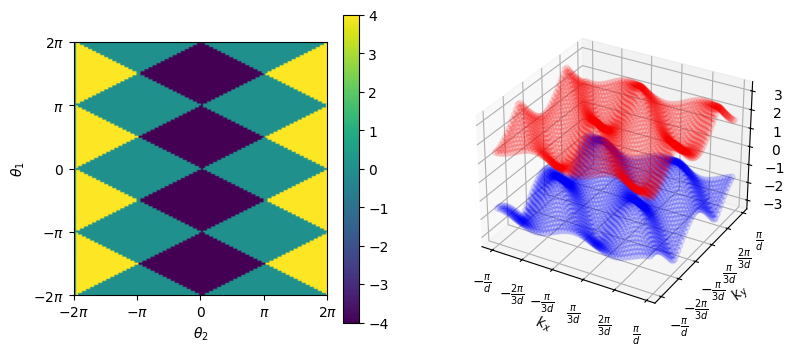

In [ ]:
ChernMat = pd.read_csv("ChernNum.csv",header = 0).to_numpy()[:,1:]

x_tick = [-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi]
x_labs = [r'$-2\pi $',r'$-\pi$', r'$0$',r'$\pi$',r'$2\pi$']

k_tick = [i for i in range(0,60,10)]
k_labs = [r'$-\frac{\pi}{d}$', r'$-\frac{2\pi}{3d}$', r'$-\frac{\pi}{3d}$', r'$\frac{\pi}{3d}$' , r'$\frac{2\pi}{3d}$', r'$\frac{\pi}{d}$']
#k_labs = [r'$0 $',r'$\frac{2\pi}{5}$', r'$\frac{4\pi}{5}$',r'$\frac{6\pi}{5}$',r'$\frac{8\pi}{5}$',r'$2\pi$']

fig = plt.figure(figsize = (9,4))
ax1 = fig.add_subplot(1,2,2,projection = '3d')

ax1.scatter(x,y,Es[:,:,1].real, color = "red", alpha = 0.1)
ax1.scatter(x,y,Es[:,:,0].real, color = "blue", alpha = 0.1)
ax1.set_xlabel(r"$k_{x}$")
ax1.set_ylabel(r"$k_{y}$")
ax1.set_xticks(k_tick, k_labs)
ax1.set_yticks(k_tick, k_labs)
ax1.set_zlabel(r"E")

ax2 = fig.add_subplot(1,2,1)
cax = ax2.imshow(ChernMat, extent = [-2* np.pi , 2 *np.pi,-2* np.pi , 2 *np.pi ], cmap = "viridis")
ax2.set_xlabel(r"$\theta_{2}$")
ax2.set_ylabel(r"$\theta_{1}$")
ax2.set_xticks(x_tick, x_labs)
ax2.set_yticks(x_tick, x_labs)
fig.colorbar(cax)

plt.tight_layout()
fig.savefig("ChernNum.pdf",format = "pdf",bbox_inches = "tight")


In [ ]:
dim = 50

calc = TwoDimCalc(dim)
V1,V2,Es = CalcEigenVectors(calc, 1.5 , 1, 0.5, 0.01)
Fnm = CalcFlux(V1)
C_ = CalcChern(Fnm)

print(C_)

tab = np.arange(0,dim)
x,y = np.meshgrid(tab,tab)

-4.0


In [ ]:
dim = 50
nums = 2000
calc = TwoDimCalc(dim)

th1 = np.random.uniform(low = -2 * np.pi, high = 2 * np.pi , size = (nums,))
th2 = np.random.uniform(low = -2 * np.pi, high = 2 * np.pi , size = (nums,))
th3 = np.random.uniform(low = -2 * np.pi, high = 2 * np.pi , size = (nums,))
gamma = np.random.uniform(low = 0, high = 2 , size = (nums,))
ans = []

for th1_, th2_, th3_, gam_ in zip(th1,th2,th3,gamma):
  V1,V2,Es = CalcEigenVectors(calc, th1_, th2_ , th3_, gam_)
  Fnm = CalcFlux(V1)
  C_ = CalcChern(Fnm)
  ans.append(C_)

ans = np.array(ans)
df = pd.DataFrame(np.array([th1,th2,th3,gamma,ans]).T)

In [ ]:
df_2 = df.copy()
df_2.columns = ["th1","th2","th3","gamma","C_plus"]

name = f"set_{np.random.randint(100000)}.csv"

df_2.to_csv(name)
files.download(name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>